Author: Dr. Göktuğ Aşcı <br>
Data: [Data set on Heart attack possibility](https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility)

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# importing data wrangling and data visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipw
import datetime
import seaborn as sns
import collections

# importing preprocessing libraries
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, Normalizer, normalize, MinMaxScaler, RobustScaler, StandardScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import set_config

# to save models
import pickle 

# importing machine learning components
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

### Table of Contents:
1. Introduction
2. Exploratory Data Analysis
3. Data Visualization
4. Feature Engineering
5. ML Predictive Analysis
6. Conclusions

# 1. Introduction

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack.

### Column Descriptions
1. `age` - age in years
2. `sex` - (1 = male; 0 = female)
3. `cp` - chest pain type
    * 0: Typical angina
    * 1: Atypical angina
    * 2: Non-anginal pain
    * 3: Asymptomatic
4. `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) 
5. `chol` - Serum cholesterole in mg/dl
6. `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. `restecg` - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
    * 2: Possible or definite left ventricular hypertrophy
8. `thalach` - maximum heart rate achieved
9. `exang` - exercise induced angina (1 = yes; 0 = no)
10. `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. `slope` - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. `ca` - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. `thal` - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [2]:
# importing the dataset
raw_dataset = pd.read_csv("../data/heart.csv")

# given column names
column_names = ["Age", "Sex", "Angina", "Rest_BP", "Cholesterole", "Fasting_BS", "ECG", "Stress_BPM", "SI_Angina", "Stress_STDep", "Slope", "Colored_Vessels", "Thalium", "Diagnose"]

# copy the original data set
df= raw_dataset.copy()

# update column names
df.columns = column_names

# 2. Exploratory Data Analysis

In [3]:
df.head()

,Age,Sex,Angina,Rest_BP,Cholesterole,Fasting_BS,ECG,Stress_BPM,SI_Angina,Stress_STDep,Slope,Colored_Vessels,Thalium,Diagnose
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,Age,Sex,Angina,Rest_BP,Cholesterole,Fasting_BS,ECG,Stress_BPM,SI_Angina,Stress_STDep,Slope,Colored_Vessels,Thalium,Diagnose
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# see the unique values for every column
for col in list(df.columns):
    print("{} unique values: {} \n".format(col, np.sort(df[col].unique())))

Age unique values: [29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77] 

Sex unique values: [0 1] 

Angina unique values: [0 1 2 3] 

Rest_BP unique values: [ 94 100 101 102 104 105 106 108 110 112 114 115 117 118 120 122 123 124
 125 126 128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152
 154 155 156 160 164 165 170 172 174 178 180 192 200] 

Cholesterole unique values: [126 131 141 149 157 160 164 166 167 168 169 172 174 175 176 177 178 180
 182 183 184 185 186 187 188 192 193 195 196 197 198 199 200 201 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241
 242 243 244 245 246 247 248 249 250 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 273 274 275 276 277 278 281
 282 283 284 286 288 289 290 293 294 295 298 299 300 302 303 304 305 306
 307 308 309 311 313 315 318

In [6]:
print("Column data types:")
df.dtypes

Column data types:


Age                  int64
Sex                  int64
Angina               int64
Rest_BP              int64
Cholesterole         int64
Fasting_BS           int64
ECG                  int64
Stress_BPM           int64
SI_Angina            int64
Stress_STDep       float64
Slope                int64
Colored_Vessels      int64
Thalium              int64
Diagnose             int64
dtype: object

In [7]:
df.describe()

,Age,Sex,Angina,Rest_BP,Cholesterole,Fasting_BS,ECG,Stress_BPM,SI_Angina,Stress_STDep,Slope,Colored_Vessels,Thalium,Diagnose
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              303 non-null    int64  
 1   Sex              303 non-null    int64  
 2   Angina           303 non-null    int64  
 3   Rest_BP          303 non-null    int64  
 4   Cholesterole     303 non-null    int64  
 5   Fasting_BS       303 non-null    int64  
 6   ECG              303 non-null    int64  
 7   Stress_BPM       303 non-null    int64  
 8   SI_Angina        303 non-null    int64  
 9   Stress_STDep     303 non-null    float64
 10  Slope            303 non-null    int64  
 11  Colored_Vessels  303 non-null    int64  
 12  Thalium          303 non-null    int64  
 13  Diagnose         303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# counting nan values
count_nan = len(df) - df.count()
count_nan

Age                0
Sex                0
Angina             0
Rest_BP            0
Cholesterole       0
Fasting_BS         0
ECG                0
Stress_BPM         0
SI_Angina          0
Stress_STDep       0
Slope              0
Colored_Vessels    0
Thalium            0
Diagnose           0
dtype: int64

There are no null values.

In [10]:
col_list = list(df.columns)
remove_list = ['Angina', 'Sex'] # remove these values from the group by comparison

for el in remove_list: 
    col_list.remove(el) 

List differences between different angina types among different sexes:

In [11]:
angina_types = df.groupby(['Angina','Sex'])[col_list].mean().round(3)
angina_types

Age  Rest_BP  Cholesterole  Fasting_BS    ECG  Stress_BPM  \
Angina Sex                                                                 
0      0    57.256  138.590       267.538       0.128  0.538     145.282   
       1    55.106  129.558       243.606       0.125  0.452     138.760   
1      0    51.944  128.056       251.444       0.111  0.556     162.833   
       1    51.031  128.594       241.031       0.094  0.656     162.188   
2      0    54.971  127.886       261.057       0.114  0.600     151.800   
       1    52.538  132.058       231.135       0.250  0.596     158.173   
3      0    63.250  147.500       247.000       0.250  0.750     149.500   
       1    54.316  139.474       235.053       0.211  0.316     157.316   

            SI_Angina  Stress_STDep  Slope  Colored_Vessels  Thalium  Diagnose  
Angina Sex                                                                      
0      0        0.462         1.356  1.179            0.821    2.282     0.462  
       1        0.596         1.393  1.288            1.019    2.510     0.202  
1      0        0.111         0.461  1.667            0.556    2.000     0.889  
       1        0.062         0.234  1.688            0.344    2.219     0.781  
2      0        0.057         0.474  1.571            0.257    2.029     0.971  
       1        0.173         1.015  1.462            0.808    2.327     0.673  
3      0        0.000         1.575  1.500            0.500    2.000     1.000  
       1        0.211         1.353  1.211            0.474    2.316     0.632

# 3. Data Visualization

In [12]:
# for better theming sns.set was applied:
sns.set()

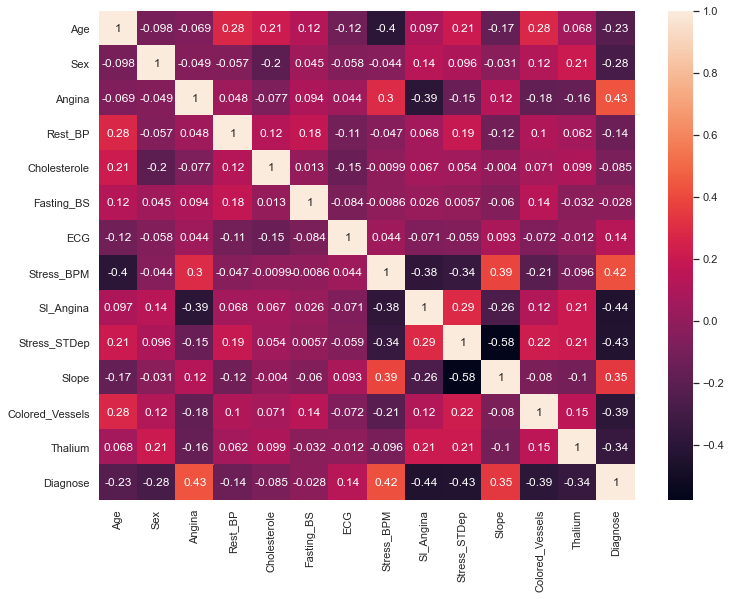

In [13]:
# create a correlation heatmap to see correlations between variables
plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(), annot=True);

Text(0, 0.5, 'Diagnose mean')

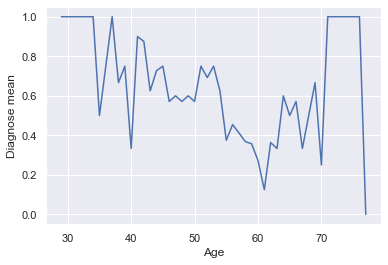

In [14]:
# modify column_name to see different insights
column_name = "Age"

dayofweek_rides = df.groupby([column_name])['Diagnose'].mean()
dayofweek_rides.plot.line(x=column_name, y='Diagnose')

plt.xlabel(column_name)

plt.ylabel("Diagnose mean")

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

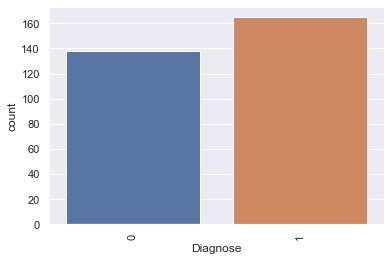

In [15]:
# modify column_name to see different insights
column_name = "Diagnose"

ax = sns.countplot(data=df, x=column_name)
plt.xticks(rotation=90)

Our dataset is balanced, therefore we can use accuracy as a metric.

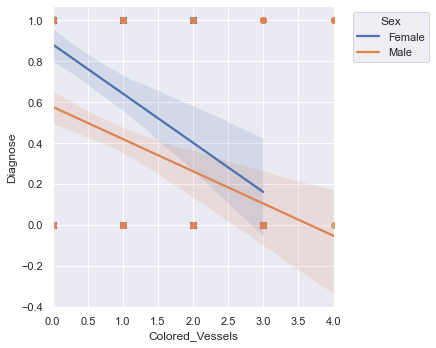

In [16]:
# modify column_name to see different insights
column_name = "Colored_Vessels"

g = sns.lmplot(
    x=column_name, 
    y="Diagnose", 
    data=df, 
    hue="Sex", 
    markers=["x", "o"],
    legend=False
)

plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1.05, 1), labels=['Female', 'Male'])
plt.show(g)

# 4. Feature Engineering

In [17]:
# create a reproducible function for the input data
def apply_feature_engineering(df):
    df['Sex'] = df['Sex'].map(lambda x: {0: 'Female', 1: 'Male'}.get(x))
    df['Angina'] = df['Angina'].map(lambda x: {0: 'Angina', 1: 'Atypical_Angina', 2: 'Non-Anginal'}.get(x))
    df['Slope'] = df['Slope'].map(lambda x: {0: 'Upsloping', 1: 'Flatsloping', 2: 'Downsloping'}.get(x))
    #df['ECG'] = df['ECG'].map(lambda x: {0: 'ECG_Normal', 1: 'ECG_STT_Abn', 2: 'ECG_LVH'}.get(x))
    
    df = pd.get_dummies(df, prefix='', prefix_sep='')
    return df

# apply feature engineering
df = apply_feature_engineering(df)

df.head()

In [18]:
df.columns

Index(['Age', 'Sex', 'Angina', 'Rest_BP', 'Cholesterole', 'Fasting_BS', 'ECG',
       'Stress_BPM', 'SI_Angina', 'Stress_STDep', 'Slope', 'Colored_Vessels',
       'Thalium', 'Diagnose'],
      dtype='object')

Number of total features after feature engineering:

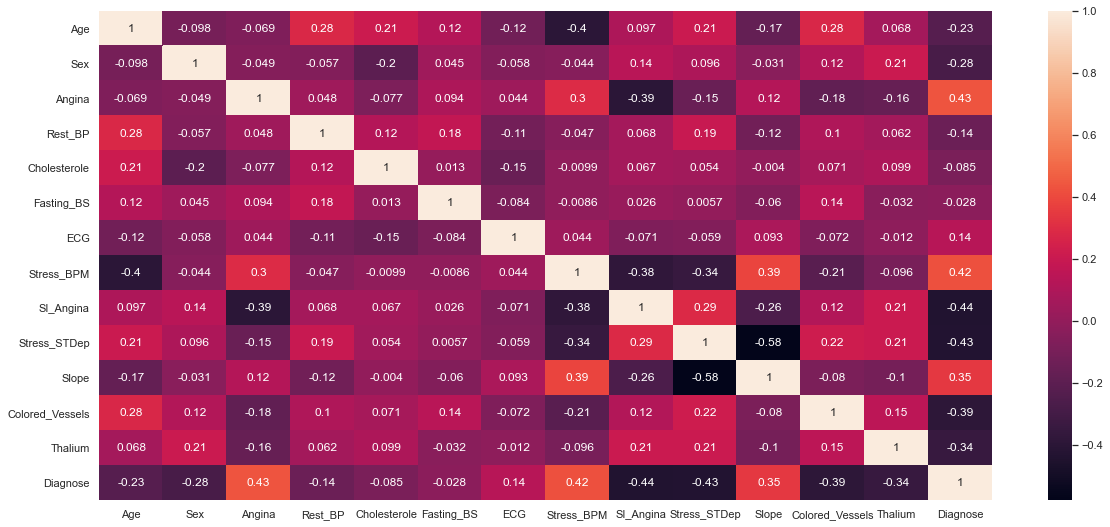

In [19]:
# plot a new correlation table after feature engineering
plt.subplots(figsize=(20,9))
sns.heatmap(df.corr(), annot=True);

# 5. ML Predictive Analysis

In [20]:
# defining a constant seed to be able to replicate the same conditions:
seed=120

In [21]:
# defining target & feature columns:
X = df.drop(columns=['Diagnose'])
y = df[['Diagnose']]

In [22]:
# manual train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

### 5.1 Find the Best Model

In [23]:
preprocessing = ColumnTransformer([
    
    # Thalium dropper 
    ("Thalium_dropper", "drop", ["Thalium"]), # dropping because all the values are within the normal limits
    
    # ECG dropper 
    ("ECG_dropper", "drop", ["ECG"]), # experiment without ECG values
    
], remainder="passthrough")

In [24]:
# creating the pipeline
clf = Pipeline([
    ("preprocessing", preprocessing),
    ("scaler", StandardScaler()), # scaled values before PCA
    ("pca", PCA()),
    ("classification", None) # start with linear regression but go deeper with other algorithms
])

In [25]:
# creating the list of algorithms and hyperparameters to try:
# we reduced the number of test hyperparameters to reduce execution time of the notebook: see "tried" hyperparameters
param_grid = [
    {   "pca__n_components": [13], # list(range(11, 18)) tried
        "classification": [LogisticRegression()], 
        "classification__max_iter": [500], # 300, 400, 1000, 1500 tried
        "classification__penalty": ["l2"], # l1 tried
        "classification__random_state": [seed],
        "classification__C": [2.782559402207126], # np.logspace(-4, 4, 10) tried
    },
    {   "pca__n_components": [13], # list(range(11, 18)) tried
        "classification": [MLPClassifier()], 
        "classification__max_iter": [300], # 400, 1000, 1500 tried
        "classification__random_state": [seed],
        "classification__early_stopping": [True],
        "classification__activation": ["tanh"], # relu tried
        "classification__hidden_layer_sizes": [(100,), (64, 32, 32, 16)]
    },
    #{
    #    "pca__n_components": [13],
    #    "classification": [DecisionTreeClassifier()], 
    #    "classification__max_depth": [10], # tried
    #    "classification__random_state": [seed],
    #},
    #{
    #    "pca__n_components": [13],
    #    "classification": [RandomForestClassifier()],
    #    "classification__random_state": [seed],
    #    "classification__max_depth": [10],  # tried
    #    "classification__n_estimators": [30],  # tried
    #    "classification__max_features": [0.7]  # tried
    #},
    #{
    #    "pca__n_components": [13],
    #    "classification": [XGBClassifier()],
    #    "classification__random_state": [seed],
    #    "classification__max_depth": [10], # tried
    #    "classification__n_estimators": [100], # tried
    #    "classification__learning_rate": [0.1], # tried
    #    "classification__early_stopping_rounds": [15] # tried
    #}
]

In [26]:
clf = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, scoring="accuracy")

In [27]:
clf.fit(X_train, y_train)

ValueError: Number of features of the input must be equal to or greater than that of the fitted transformer. Transformer n_features is 18 and input n_features is 17.

In [ ]:
# list all the scores of different models
test_scores = clf.cv_results_['mean_test_score']
test_scores

In [ ]:
# listing the best parameters for the param_grid:
clf.best_params_

In [ ]:
# get the best score
clf.best_score_

In [ ]:
# store the best model in a variable
best_model = clf.best_estimator_

In [ ]:
# save the trained model as a pickle string. 
filename = 'classification_chd.sav'
pickle.dump(best_model, open(filename, 'wb'))

### 5.2 Calculation Predictions

In [ ]:
X_test

In [ ]:
# let's use the test set to create predictions
predictions = best_model.predict(X_test)

In [ ]:
# calculating the accuracy score manually
score = accuracy_score(y_test, predictions)
score

In [ ]:
# creating the confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

In [ ]:
# plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 11);

### 5.3 Training and CV Scores Comparison

In [ ]:
# determines cross-validated training and test scores for different training set sizes
train_sizes, train_scores, cv_scores = learning_curve(clf.best_estimator_, X_train, y_train.values.ravel(), cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train scores")
plt.plot(train_sizes, cv_scores.mean(axis=1), label="CV scores")

plt.legend()

# 6. Conclusions

* Logistic Regression algorithm scored the best with an accuracy score of **0.8018826135105204**.
* We have a relatively accurate model for heart disease prediction. But to create a more accurate and reliable model, we need a larger dataset with thousands of patient data. (We have just **303 patient rows** in this dataset).
* Such a model can be used to predict the risk of heart disease in clinics to **aid doctors and reduce hospital costs**.